In [27]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

- count len of sentences, words, text, paragraphs

In [28]:
with open("../data/raf.txt", 'r') as text:
    textfile = text.read()
#     print(textfile)

In [29]:
type(textfile)

str

In [30]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_review = tokenizer.tokenize(textfile)

In [31]:
fdist = FreqDist(tokenized_review)
print(fdist)

<FreqDist with 2944 samples and 10531 outcomes>


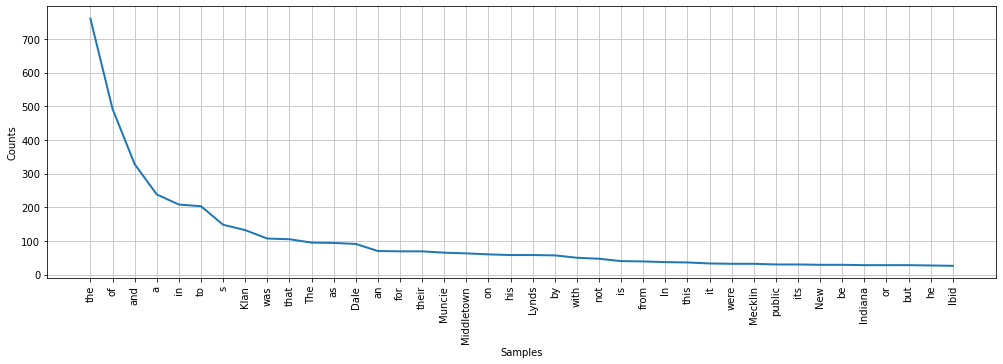

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
plt.figure(figsize=(17,5))
fdist.plot(40)

In [33]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'on', 'it', 'doesn', 'her', 'y', 'when', 'he', 'in', 'was', 'of', 'wasn', 'do', 'and', 'our', 'about', 'mightn', 'any', 'yourselves', 'no', 'needn', 'into', "you'll", "you'd", 'weren', 'the', 'over', 'before', 'we', 'their', "haven't", 'both', 'but', "should've", "wouldn't", 'd', 'being', 'these', 'hasn', 'ours', 'how', 't', "she's", 'same', 'now', 'here', 'does', 'more', 'myself', 'isn', 'as', 'for', 'nor', 's', "you're", 'yours', 'which', 'by', 'am', 'its', "hasn't", 'too', 'didn', "didn't", 'some', "shouldn't", 'during', 'after', 'ourselves', 'aren', 'my', 'once', 'haven', "doesn't", 'your', 'until', 'against', 'with', 'there', 'his', 'from', 'because', 'all', 'off', 'each', 'theirs', 'most', "aren't", 'me', "mightn't", 'hers', "you've", 'be', 'should', "shan't", 'those', "that'll", 'yourself', 'below', 'don', 'just', 'while', 'will', 'ma', "couldn't", 'other', 'whom', 'll', 'at', 'why', 'under', 'so', "it's", 'where', 'can', "don't", "needn't", 'then', 're', 'is', 'out', 'you', 'h

In [34]:
import string

#adding additional words I don't find to be that valuable
additional_stopwords = ['https', 'I', 'com', 'http', 'RT', 'co', 'the', 'amp', 'the', 'lt', 'A', 'www', 'rt', 'got', 'get', 
                        'ly', 'u', 'In', 'in', 'The', 'the', 'Ibid']

stop_words = stopwords.words('english')

stop_words += list(string.punctuation)

stop_words += additional_stopwords

In [35]:
filtered_review=[]
for w in tokenized_review:
    if w not in stop_words:
        filtered_review.append(w)
# print("Filterd Sentence:",filtered_review)

In [36]:
print(len(tokenized_review))
print(len(filtered_review))

10531
6312


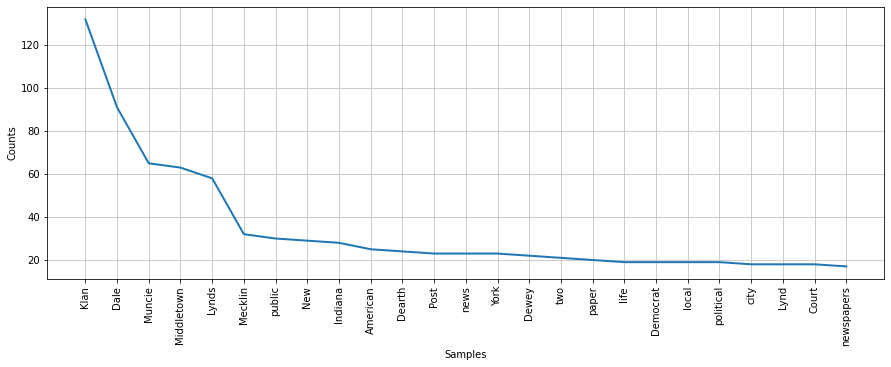

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [52]:
fdist = FreqDist(filtered_review)
plt.figure(figsize=(15,5))
fdist.plot(25)

In [50]:
# fdist.values()

In [54]:
# fdist = FreqDist(filtered_review)
# plt.figure(figsize=(15,5))
# plt.bar(fdist.keys(), fdist.values())

In [55]:
# implementing it in python
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts

vec = CountVectorizer(stop_words=None)
X = vec.fit_transform([textfile])


df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df

,00,000,10,100,103,104,106,107,109,11,...,yields,york,yorker,you,young,your,youths,zeitgeist,œcommon,œcompact
0,1,3,4,2,1,2,1,2,1,5,...,1,23,2,1,4,1,1,1,1,1


In [76]:
# df.index

RangeIndex(start=0, stop=1, step=1)

In [56]:
# df.columns

In [78]:
# df1 = df.stack()

In [52]:
# df.unstack()

In [61]:
pd.options.display.max_seq_items = None
# df.columns

In [57]:
df = df.transpose()

In [58]:
df.head()

,0
00,1
000,3
10,4
100,2
103,1


In [65]:
df = df.reset_index()

In [71]:
df[0].sort_values(ascending=False)

2486    854
1784    492
286     330
1311    245
2528    210
       ... 
1638      1
1639      1
1640      1
1641      1
0         1
Name: 0, Length: 2784, dtype: int64

In [89]:
df = df.reset_index()

In [73]:
# df.rename(columns={'index':'word'})

In [90]:
df.columns

Index(['index', 0], dtype='object')

In [91]:
df['index']

0              00
1             000
2              10
3             100
4             103
          ...    
2779         your
2780       youths
2781    zeitgeist
2782      œcommon
2783     œcompact
Name: index, Length: 2784, dtype: object

In [96]:
df_g = df.groupby(['index']).nunique()

In [100]:
df_g.reset_index()

,index,0
0,00,1
1,000,1
2,10,1
3,100,1
4,103,1
...,...,...
2779,your,1
2780,youths,1
2781,zeitgeist,1
2782,œcommon,1


In [101]:
df_g[df_g[0] > 2]

,0
index,
